In [1]:
import mygdal
import numpy
import matplotlib.pyplot as plt
from datetime import timedelta

# doy = mygdal.Mygdal('/dados/d2/rolf/STACK/doy.tif')
doy = mygdal.Mygdal('C:/Users/Rolf/Downloads/STACK/doy.tif')
ndvi = mygdal.Mygdal('C:/Users/Rolf/Downloads/STACK/ndvi.tif')
# doy.attrs_len, ndvi.attrs_len

In [2]:
import pandas

p = pandas.read_csv('../data/samples_new.csv', comment='#')
p.head()

,longitude,latitude,from,to,label
0,616962.535080,-1.331334e+06,09/01/07,09/01/08,Forest
1,617638.512122,-1.330514e+06,09/01/07,09/01/08,Forest
2,617891.008068,-1.330461e+06,09/01/07,09/01/08,Forest
3,617900.551739,-1.330707e+06,09/01/07,09/01/08,Forest
4,615377.144056,-1.330847e+06,09/01/07,09/01/08,Forest


In [3]:
p['from'] = pandas.to_datetime(p['from'], format='%m/%d/%y')
p['to'] = pandas.to_datetime(p['to'], format='%m/%d/%y')
p.head()

,longitude,latitude,from,to,label
0,616962.535080,-1.331334e+06,2007-09-01,2008-09-01,Forest
1,617638.512122,-1.330514e+06,2007-09-01,2008-09-01,Forest
2,617891.008068,-1.330461e+06,2007-09-01,2008-09-01,Forest
3,617900.551739,-1.330707e+06,2007-09-01,2008-09-01,Forest
4,615377.144056,-1.330847e+06,2007-09-01,2008-09-01,Forest


In [4]:
t = pandas.read_csv('../data/timeline_new.csv', comment='#')
t['date'] = pandas.to_datetime(t['date'], format='%Y-%m-%d')
t.head()

,source,date
0,LT5,2000-01-10
1,LE7,2000-01-18
2,LE7,2000-02-03
3,LT5,2000-02-11
4,MOD,2000-02-19


In [5]:
pixels = doy.geolocs_to_pixels(p[['longitude', 'latitude']])
p['px'] = pixels[:,0]
p['py'] = pixels[:,1]
p.head()

,longitude,latitude,from,to,label,px,py
0,616962.535080,-1.331334e+06,2007-09-01,2008-09-01,Forest,272,215
1,617638.512122,-1.330514e+06,2007-09-01,2008-09-01,Forest,295,187
2,617891.008068,-1.330461e+06,2007-09-01,2008-09-01,Forest,303,186
3,617900.551739,-1.330707e+06,2007-09-01,2008-09-01,Forest,304,194
4,615377.144056,-1.330847e+06,2007-09-01,2008-09-01,Forest,220,199


In [6]:
base_dates = pandas.to_datetime(pandas.DataFrame(
        {'year': pandas.DatetimeIndex(t['date']).year, 'month': 1, 'day': 1}))
pixel = p.loc[0,['px', 'py']]
doy_values = doy.read_pixel(pixel, factor_value=100000, min_value=0, max_value=366)
len(doy_values), len(t['date']), len(base_dates)

(986, 986, 986)

In [78]:
from datetime import timedelta
timedelta_values = [timedelta(days=int(doy_values[i] if not numpy.isnan(doy_values[i]) else 
                                       (t['date'][i] - base_dates[i]).days)) 
                    for i in range(len(doy_values))]
date_values = base_dates + timedelta_values
ndvi_values = ndvi.read_pixel(pixel, factor_value=10, min_value=-1, max_value=1)
good_ndvi = ~(numpy.isnan(ndvi_values))
ndvi_values = ndvi_values[good_ndvi]
date_values = date_values[good_ndvi]
ndvi_series = pandas.Series(ndvi_values, index=date_values)
ndvi_series.head()

2000-01-18    0.8218
2000-04-04    0.8222
2000-04-07    0.6788
2000-05-01    0.8196
2000-05-09    0.7815
dtype: float64

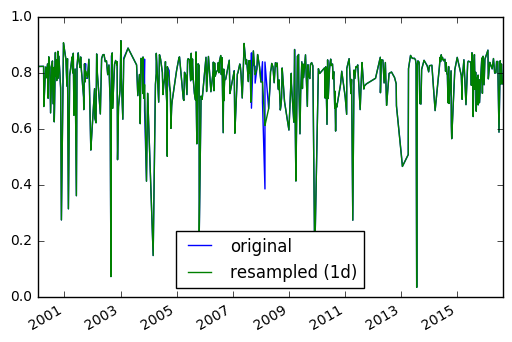

In [43]:
ndvi_series_regular = ndvi_series.resample('1d')
ndvi_series.plot()
ndvi_series_regular.mean().interpolate(method='linear').plot()
plt.legend(['original', 'resampled (1d)'], loc='best')
plt.show()

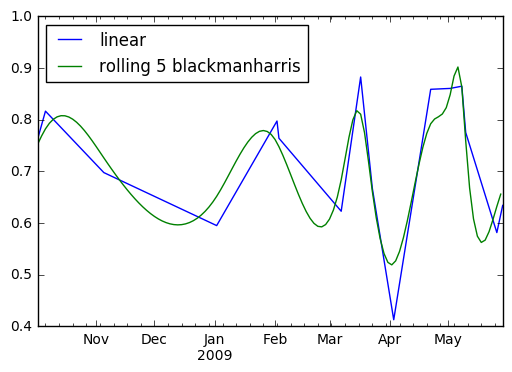

In [44]:
ndvi_series_regular.mean().interpolate(method='linear')[3180:3420].plot()
ndvi_series.rolling(5, min_periods=3, center=True, win_type='blackmanharris').mean().resample('2d').mean().interpolate(method='cubic')[1590:1710].plot()
plt.legend(['linear', 'rolling 5 blackmanharris'], loc='best')
plt.show()

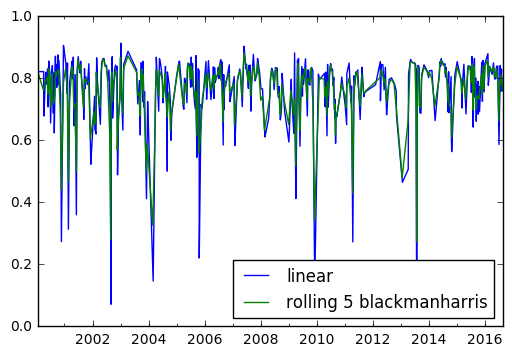

In [45]:
ndvi_series_regular.mean().interpolate(method='linear').plot()
ndvi_series.rolling(5, min_periods=3, center=True, win_type='blackmanharris').mean().resample('7d').mean().interpolate(method='linear').plot()
plt.legend(['linear', 'rolling 5 blackmanharris'], loc='best')
plt.show()

In [29]:
[q for q in p[p['label']=='Forest'].index]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568]

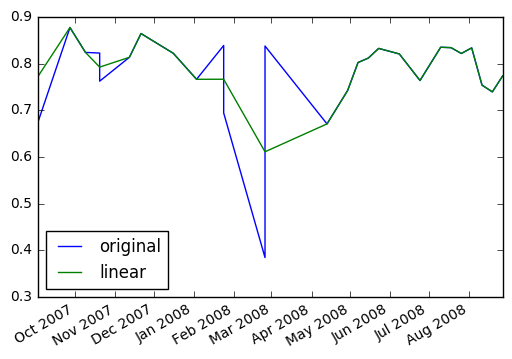

In [47]:
ndvi_series[(ndvi_series.index >= p['from'][0]) * (ndvi_series.index <= p['to'][0])].plot()
ndvi_series_regular = ndvi_series[(ndvi_series.index >= p['from'][0]) * (ndvi_series.index <= p['to'][0])].resample('1d')
ndvi_series_regular.mean().interpolate(method='linear').plot()
plt.legend(['original', 'linear'], loc='best')
plt.show()

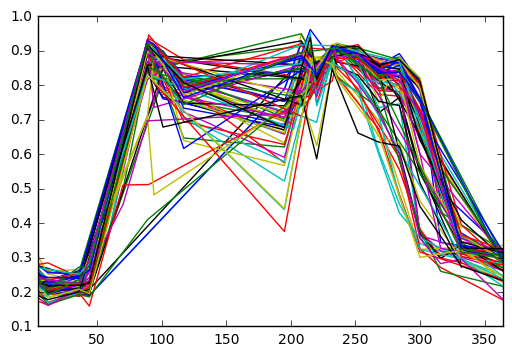

In [48]:
tss = []
base_dates = pandas.to_datetime(pandas.DataFrame(
        {'year': pandas.DatetimeIndex(t['date']).year, 'month': 1, 'day': 1}))
for i in p[p['label']=='Soybean-cotton'].index:
    doy_values = doy.read_pixel(p.loc[i,['px','py']], factor_value=100000, min_value=0, max_value=366)
    timedelta_values = [timedelta(days=int(doy_values[j] if not numpy.isnan(doy_values[j]) else
                                           (t['date'][j] - base_dates[j]).days))
                        for j in range(len(doy_values))]
    date_values = base_dates + timedelta_values
    ndvi_values = ndvi.read_pixel(p.loc[i,['px','py']], factor_value=10, min_value=-1, max_value=1)
    good_ndvi = ~(numpy.isnan(ndvi_values))
    ndvi_values = ndvi_values[good_ndvi]
    date_values = date_values[good_ndvi]
    ndvi_series = pandas.Series(ndvi_values, index=date_values)
    ndvi_series_regular = ndvi_series[(ndvi_series.index >= p['from'][i]) * 
                                      (ndvi_series.index <= p['to'][i])].resample('1d').mean().interpolate(method='linear')
    #.rolling(5, min_periods=3, 
    #        center=True, 
    #        win_type='blackmanharris').mean().resample('7d')
    tss.append(pandas.Series(ndvi_series_regular.values, index=(ndvi_series_regular.index - p['from'][i]).days))
for ts in tss:
    ts.plot()
plt.show()

In [111]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    return sqrt(LB_sum)

def DTWDistance(s1, s2, w):
    DTW={}
    w = max(w, abs(len(s1)-len(s2)))
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
    return numpy.sqrt(DTW[len(s1)-1, len(s2)-1])

In [56]:
def read_timeseries_label(mygdal_measure, label, time_resolution):
    result = []
    base_dates = pandas.to_datetime(pandas.DataFrame(
            {'year': pandas.DatetimeIndex(t['date']).year, 'month': 1, 'day': 1}))
    for i in p[p['label']==label].index:
        doy_values = doy.read_pixel(p.loc[i,['px','py']], factor_value=100000, min_value=0, max_value=366)
        timedelta_values = [timedelta(days=int(doy_values[j] if not numpy.isnan(doy_values[j]) else
                                               (t['date'][j] - base_dates[j]).days))
                            for j in range(len(doy_values))]
        date_values = base_dates + timedelta_values
        measure_values = mygdal_measure.read_pixel(p.loc[i,['px','py']], factor_value=10, min_value=-1, max_value=1)
        good_measures = ~(numpy.isnan(measure_values))
        date_values = date_values[good_measures]
        measure_values = measure_values[good_measures]
        measure_series = pandas.Series(measure_values, index=date_values)
        measure_series_regular = measure_series.resample(time_resolution).mean().interpolate(
            method='linear')[(measure_series.index >= p['from'][i]) * (measure_series.index <= p['to'][i])]
        #ndvi_series_regular = ndvi_series.rolling(5, min_periods=1, center=True, 
        #                                   win_type='blackmanharris').mean()[(ndvi_series.index >= p['from'][i]) * 
        #                                   (ndvi_series.index <= p['to'][i])].resample('7d').mean().interpolate(method='linear')
        result.append(pandas.Series(measure_series_regular.values, index=(measure_series_regular.index - p['from'][i]).days))
    return result

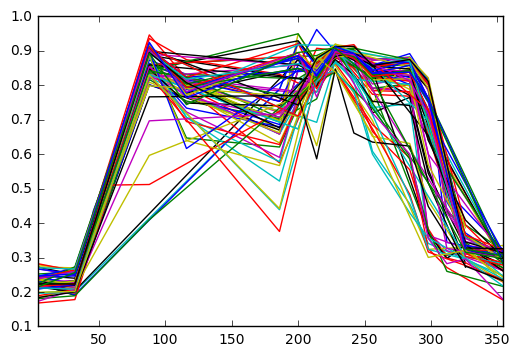

In [101]:
tss = read_timeseries_label(ndvi, 'Soybean-cotton', '14d')
for ts in tss:
    ts.plot()
plt.show()

In [130]:
dtw_dist_triangle = []
for i in range(len(tss) - 1):
    for j in range(i + 1, len(tss)):
        dtw_dist_triangle.append(DTWDistance(tss[i].values, tss[j].values, 5))
dtw_dist_triangle

[0.28383738634804417,
 0.3642523849585444,
 0.43416798640198145,
 0.25981327903953982,
 0.26776322175052758,
 0.28660199148958071,
 0.2740020095982672,
 0.31018316294794118,
 0.16226300602297211,
 0.34621765224071499,
 0.35506386059020756,
 0.2659361820316084,
 0.41037265861348521,
 0.19296442135720834,
 0.39533905081236581,
 0.349286373674557,
 0.35295901626070164,
 0.13966745434592934,
 0.28555412384417805,
 0.29209898585021182,
 0.21481129522016915,
 0.16182862218082578,
 0.37334227246552498,
 0.34454476365157871,
 0.27904918255519445,
 0.37966607671156988,
 0.37001688569765162,
 0.43546116400294305,
 0.2939128122798022,
 0.29978019098953523,
 0.23994408160780112,
 0.24989263283069305,
 0.27653525299177006,
 0.23782348726991243,
 0.2335431575480216,
 0.36189601137059635,
 0.33928617903581382,
 0.45033392308899217,
 0.33068014439938798,
 0.32387545120899996,
 0.25258096500319355,
 0.24143949785608809,
 0.33353016099143462,
 0.54747006104360385,
 0.25272282479746694,
 0.34307623470006

In [131]:
import scipy.spatial.distance as ssd
dtw_dist_matrix = ssd.squareform(dtw_dist_triangle)
dtw_dist_matrix

array([[ 0.        ,  0.28383739,  0.36425238, ...,  0.25590272,
         0.24370166,  0.3109617 ],
       [ 0.28383739,  0.        ,  0.1284814 , ...,  0.19247542,
         0.27455628,  0.19793633],
       [ 0.36425238,  0.1284814 ,  0.        , ...,  0.20110294,
         0.27670904,  0.21331155],
       ..., 
       [ 0.25590272,  0.19247542,  0.20110294, ...,  0.        ,
         0.18214783,  0.19665581],
       [ 0.24370166,  0.27455628,  0.27670904, ...,  0.18214783,
         0.        ,  0.16005019],
       [ 0.3109617 ,  0.19793633,  0.21331155, ...,  0.19665581,
         0.16005019,  0.        ]])

In [133]:
len(dtw_dist_matrix), len(dtw_dist_matrix[0])

(79, 79)

In [140]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(dtw_dist_triangle, 'average')
Z

array([[  3.00000000e+00,   2.80000000e+01,   4.38049052e-02,
          2.00000000e+00],
       [  6.30000000e+01,   7.70000000e+01,   5.09774215e-02,
          2.00000000e+00],
       [  5.00000000e+01,   7.00000000e+01,   5.57424216e-02,
          2.00000000e+00],
       [  4.50000000e+01,   6.50000000e+01,   5.84997483e-02,
          2.00000000e+00],
       [  1.70000000e+01,   5.90000000e+01,   5.93128728e-02,
          2.00000000e+00],
       [  8.00000000e+00,   3.00000000e+01,   6.05833861e-02,
          2.00000000e+00],
       [  7.20000000e+01,   7.40000000e+01,   6.10391427e-02,
          2.00000000e+00],
       [  4.20000000e+01,   8.00000000e+01,   6.67665962e-02,
          3.00000000e+00],
       [  7.10000000e+01,   8.10000000e+01,   6.74787769e-02,
          3.00000000e+00],
       [  3.40000000e+01,   8.60000000e+01,   7.55253686e-02,
          4.00000000e+00],
       [  6.00000000e+00,   7.00000000e+00,   7.62129733e-02,
          2.00000000e+00],
       [  3.50000000e

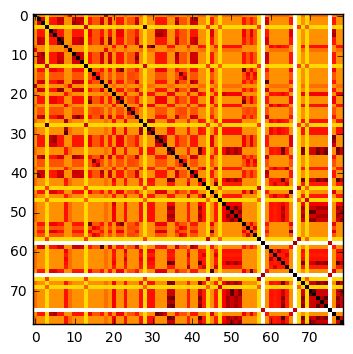

In [149]:
from scipy.cluster.hierarchy import cophenet

cophenet_matrix = ssd.squareform(cophenet(Z))
plt.imshow(cophenet_matrix, cmap='hot', interpolation='nearest')
plt.show()

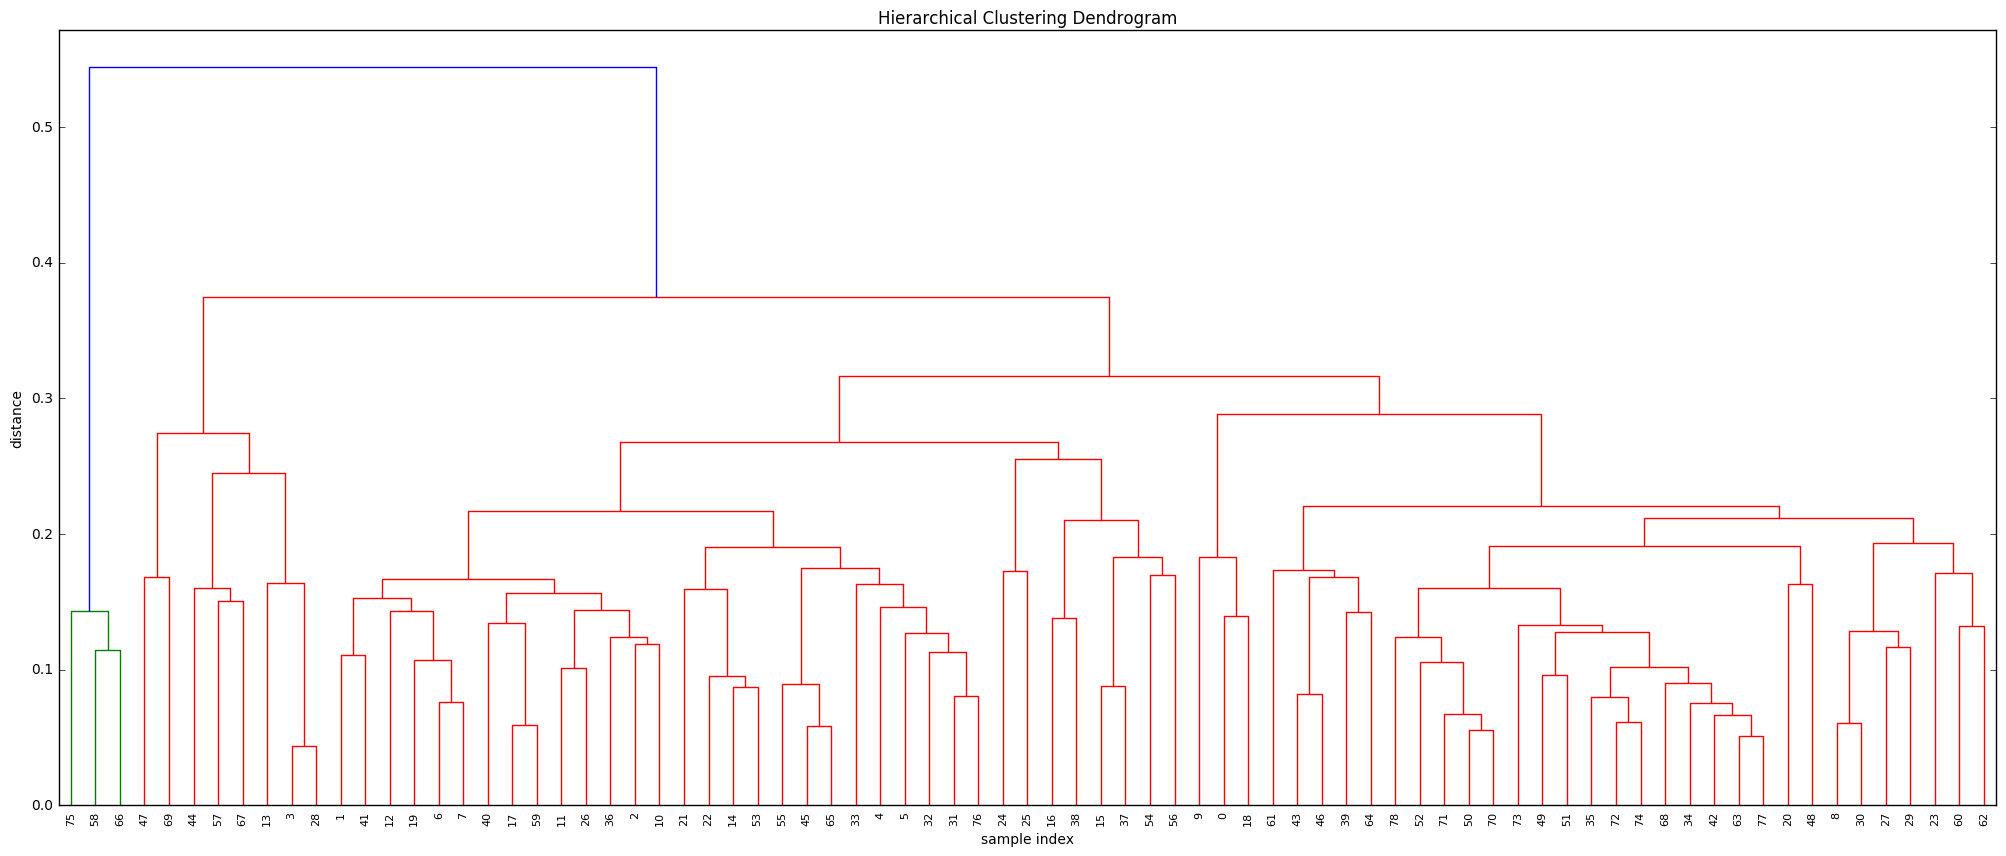

In [150]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

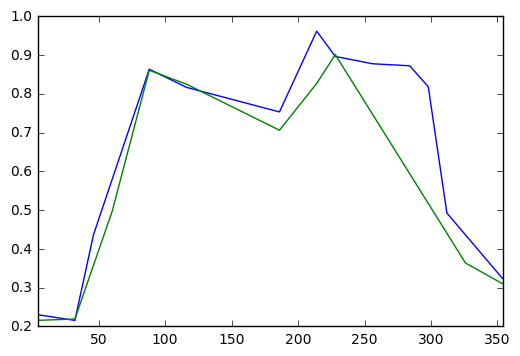

In [157]:
for i in [21, 36]:
    tss[i].plot()
plt.show()

In [160]:
Z[-10:,2] # last distances

array([ 0.21670166,  0.2202366 ,  0.2447432 ,  0.25551827,  0.26765483,
        0.2746777 ,  0.28838623,  0.3163116 ,  0.37486718,  0.5440221 ])

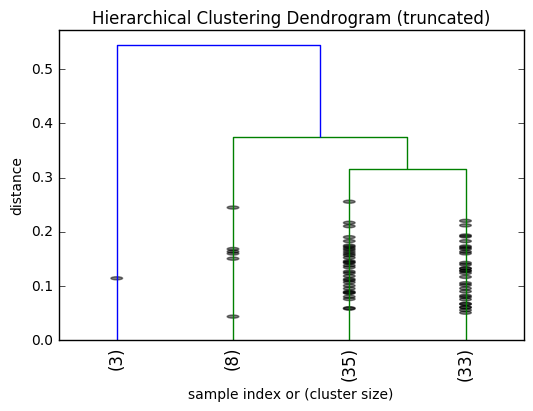

In [163]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [164]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

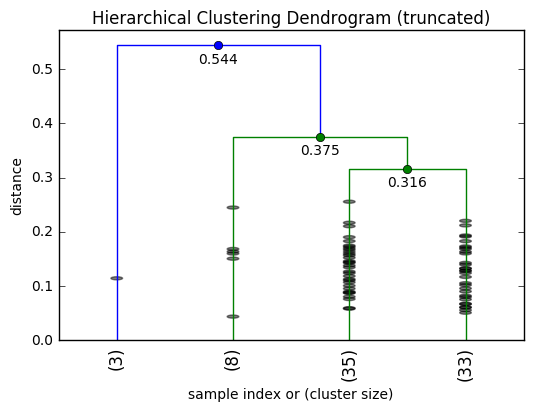

In [167]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=4,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=0.3,  # useful in small plots so annotations don't overlap
)
plt.show()

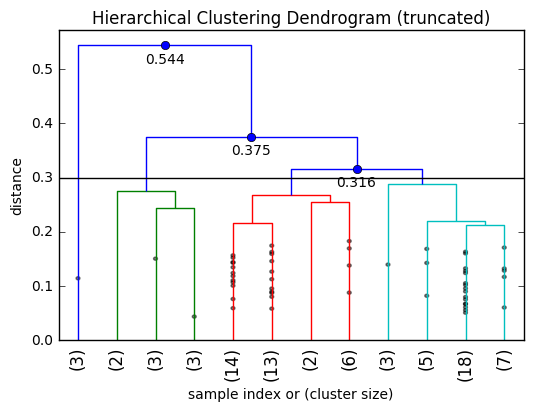

In [170]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=0.3,
    max_d=0.3
)
plt.show()

In [171]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([4, 3, 3, 2, 3, 3, 3, 3, 4, 4, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 4, 3, 3,
       4, 3, 3, 3, 4, 2, 4, 4, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 4, 4, 2, 3,
       4, 2, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 1, 3, 4, 4, 4, 4, 4, 3, 1, 2, 4,
       2, 4, 4, 4, 4, 4, 1, 3, 4, 4], dtype=int32)

In [173]:
len(tss), len(clusters)

(79, 79)

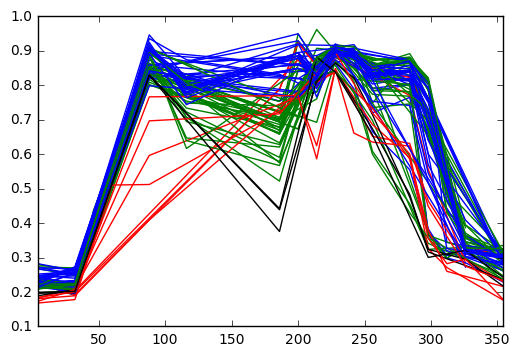

In [181]:
colors='krgb'
for i in range(len(tss)):
    tss[i].plot(style=colors[clusters[i] - 1])  # plot points with cluster dependent colors
plt.show()